# The datasets

- This notebook analyses weather data, the percentage of agricultural land, rainfall data and worldwide GDP data of a timeframe from 1961 to 2015. All used datasets are public without any copyright.
- https://climateknowledgeportal.worldbank.org/download-data 
   These datasets contain worldwide weather data, where one captures the years 1961-1990 and the second one covers years from 1991 until 2016
- http://www.foodsecurityportal.org/api/countries/agricultural-land-pe
    This dataset gives information about the percentage of agricultural land, covering a time frame from 1961 to 2015

In [161]:
# Import libraries, that are needed to fulfill analysis of the data
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [162]:
# Import the weather datasets
df = pd.read_csv('weather_data_91_16.csv', names=range(6), header=None)
df1 = pd.read_csv('weather_data_61_90.csv', names=range(6), header=None)

In [163]:
# Import the agricultural land dataset
df2 = pd.read_csv('agricultural_land.csv')

# Weather data

## Get overview of the dataset and prepare it for merging: weather data 1991-2016

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61153 entries, 0 to 61152
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       61153 non-null  object
 1   1       61153 non-null  object
 2   2       61153 non-null  object
 3   3       61153 non-null  object
 4   4       61153 non-null  object
 5   5       1560 non-null   object
dtypes: object(6)
memory usage: 2.8+ MB


In [165]:
# Show first 5 rows of df
df.head()

,0,1,2,3,4,5
0,Temperature - (Celsius),Year,Statistics,Country,ISO3,NaN
1,-0.0311,1991,Jan Average,Afghanistan,AFG,NaN
2,1.43654,1991,Feb Average,Afghanistan,AFG,NaN
3,6.88685,1991,Mar Average,Afghanistan,AFG,NaN
4,12.9397,1991,Apr Average,Afghanistan,AFG,NaN


In [166]:
# Show last 5 rows of df
df.tail()

,0,1,2,3,4,5
61148,18.7555,2016,Aug Average,Zimbabwe,ZWE,NaN
61149,22.9919,2016,Sep Average,Zimbabwe,ZWE,NaN
61150,25.8664,2016,Oct Average,Zimbabwe,ZWE,NaN
61151,25.8515,2016,Nov Average,Zimbabwe,ZWE,NaN
61152,25.0693,2016,Dec Average,Zimbabwe,ZWE,NaN


In [167]:
# Count null values
df.isna().sum()

0        0
1        0
2        0
3        0
4        0
5    59593
dtype: int64

In [168]:
# Define header
headers = df.iloc[0]
df = pd.DataFrame(df.values[1:], columns=headers)
df.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3,NaN
0,-0.0311,1991,Jan Average,Afghanistan,AFG,NaN
1,1.43654,1991,Feb Average,Afghanistan,AFG,NaN
2,6.88685,1991,Mar Average,Afghanistan,AFG,NaN
3,12.9397,1991,Apr Average,Afghanistan,AFG,NaN
4,17.0755,1991,May Average,Afghanistan,AFG,NaN


In [169]:
# Rename columns
df.rename(columns={"Temperature - (Celsius)": "Temperature(Celsius)", " Country" : "Country", " Statistics" : "Statistics", " Year" : "Year"}, inplace=True)
df.head()

,Temperature(Celsius),Year,Statistics,Country,ISO3,NaN
0,-0.0311,1991,Jan Average,Afghanistan,AFG,NaN
1,1.43654,1991,Feb Average,Afghanistan,AFG,NaN
2,6.88685,1991,Mar Average,Afghanistan,AFG,NaN
3,12.9397,1991,Apr Average,Afghanistan,AFG,NaN
4,17.0755,1991,May Average,Afghanistan,AFG,NaN


In [170]:
# Get rid of blanks in strings in column 'Country'
df['Country'] = df['Country'].str.strip()
print(df['Country'].unique().tolist())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Democratic Republic of the)', 'Congo (Republic of the)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',

In [171]:
# Check columns
df.columns.values.tolist()

['Temperature(Celsius)', 'Year', 'Statistics', 'Country', ' ISO3', nan]

In [172]:
# Delete column ISO3, because we don't need it for further analysis
df.drop([' ISO3'], axis=1, inplace=True)


In [173]:
# Delete NaN, majority is Null values
df.drop([np.nan], axis=1, inplace=True)

In [174]:
# Check if it worked
df.head()

,Temperature(Celsius),Year,Statistics,Country
0,-0.0311,1991,Jan Average,Afghanistan
1,1.43654,1991,Feb Average,Afghanistan
2,6.88685,1991,Mar Average,Afghanistan
3,12.9397,1991,Apr Average,Afghanistan
4,17.0755,1991,May Average,Afghanistan


In [175]:
# Count null values again
df.isna().sum()

0
Temperature(Celsius)    0
Year                    0
Statistics              0
Country                 0
dtype: int64

In [176]:
# Drop rows with entries for 2016 (we only observe a time frame 1961-2015)
indexNames = df[ df['Year']==' 2016'].index
df.drop(indexNames, inplace=True)
print(indexNames)

Int64Index([  300,   301,   302,   303,   304,   305,   306,   307,   308,
              309,
            ...
            61142, 61143, 61144, 61145, 61146, 61147, 61148, 61149, 61150,
            61151],
           dtype='int64', length=2352)


In [177]:
# Check if it worked
df.tail()

,Temperature(Celsius),Year,Statistics,Country
61135,19.4544,2015,Aug Average,Zimbabwe
61136,22.0932,2015,Sep Average,Zimbabwe
61137,25.9479,2015,Oct Average,Zimbabwe
61138,25.8475,2015,Nov Average,Zimbabwe
61139,26.1233,2015,Dec Average,Zimbabwe


In [178]:
# Change datatypes
df['Year'] = df['Year'].astype('int')
df['Temperature(Celsius)'] = df['Temperature(Celsius)'].astype('float')
df['Country'] = df['Country'].astype('category')

# Show changes
df.dtypes

0
Temperature(Celsius)     float64
Year                       int64
Statistics                object
Country                 category
dtype: object

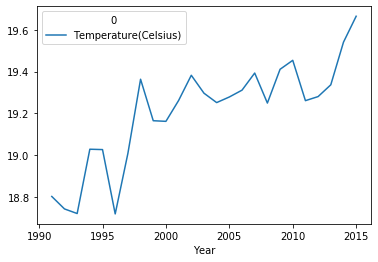

In [179]:
# Visualization of the temperature development over the observed period (1990-2015)
df_plot = df.groupby(['Year']).mean()
df_plot.plot()

## Get overview of the dataset and prepare it for merging: weather data 1961-1990

In [180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70561 entries, 0 to 70560
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       70561 non-null  object
 1   1       70561 non-null  object
 2   2       70561 non-null  object
 3   3       70561 non-null  object
 4   4       70561 non-null  object
 5   5       1800 non-null   object
dtypes: object(6)
memory usage: 3.2+ MB


In [181]:
# Show first 5 rows of df
df1.head()

,0,1,2,3,4,5
0,Temperature - (Celsius),Year,Statistics,Country,ISO3,NaN
1,1.39097,1961,Jan Average,Afghanistan,AFG,NaN
2,0.90369,1961,Feb Average,Afghanistan,AFG,NaN
3,8.00043,1961,Mar Average,Afghanistan,AFG,NaN
4,12.3588,1961,Apr Average,Afghanistan,AFG,NaN


In [182]:
# Show last 5 rows of df
df1.tail()

,0,1,2,3,4,5
70556,17.8869,1990,Aug Average,Zimbabwe,ZWE,NaN
70557,20.5122,1990,Sep Average,Zimbabwe,ZWE,NaN
70558,24.7041,1990,Oct Average,Zimbabwe,ZWE,NaN
70559,25.6733,1990,Nov Average,Zimbabwe,ZWE,NaN
70560,24.7548,1990,Dec Average,Zimbabwe,ZWE,NaN


In [183]:
# Count null values
df1.isna().sum()

0        0
1        0
2        0
3        0
4        0
5    68761
dtype: int64

In [184]:
# Define header
headers = df1.iloc[0]
df1 = pd.DataFrame(df1.values[1:], columns=headers)
df1.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3,NaN
0,1.39097,1961,Jan Average,Afghanistan,AFG,NaN
1,0.90369,1961,Feb Average,Afghanistan,AFG,NaN
2,8.00043,1961,Mar Average,Afghanistan,AFG,NaN
3,12.3588,1961,Apr Average,Afghanistan,AFG,NaN
4,19.2618,1961,May Average,Afghanistan,AFG,NaN


In [185]:
# Rename columns
df1.rename(columns={"Temperature - (Celsius)": "Temperature(Celsius)", " Country" : "Country", " Statistics" : "Statistics", " Year" : "Year"}, inplace=True)
df1.head()

,Temperature(Celsius),Year,Statistics,Country,ISO3,NaN
0,1.39097,1961,Jan Average,Afghanistan,AFG,NaN
1,0.90369,1961,Feb Average,Afghanistan,AFG,NaN
2,8.00043,1961,Mar Average,Afghanistan,AFG,NaN
3,12.3588,1961,Apr Average,Afghanistan,AFG,NaN
4,19.2618,1961,May Average,Afghanistan,AFG,NaN


In [186]:
# Get rid of blanks in strings in column 'Country'
df1['Country'] = df1['Country'].str.strip()
print(df1['Country'].unique().tolist())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Democratic Republic of the)', 'Congo (Republic of the)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',

In [187]:
# Delete column ISO3, because we don't need it
df1.drop([' ISO3'], axis=1, inplace=True)

In [188]:
# Delete NaN, majority is Null values
df1.drop([np.nan], axis=1, inplace=True)

In [189]:
# Check if it worked
df1.head()

,Temperature(Celsius),Year,Statistics,Country
0,1.39097,1961,Jan Average,Afghanistan
1,0.90369,1961,Feb Average,Afghanistan
2,8.00043,1961,Mar Average,Afghanistan
3,12.3588,1961,Apr Average,Afghanistan
4,19.2618,1961,May Average,Afghanistan


In [190]:
# Change datatypes
df1['Year'] = df1['Year'].astype('int')
df1['Temperature(Celsius)'] = df1['Temperature(Celsius)'].astype('float')
df1['Country'] = df1['Country'].astype('category')

# Show changes
df1.dtypes

0
Temperature(Celsius)     float64
Year                       int64
Statistics                object
Country                 category
dtype: object

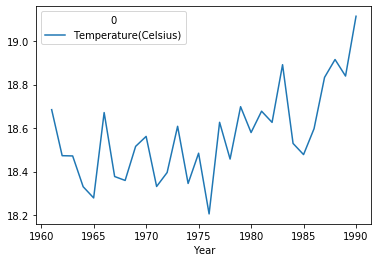

In [191]:
# Visualization of the temperature development over the observed period (1961-1990)
df1_plot = df1.groupby(['Year']).mean()
df1_plot.plot()

## Merge the weather datasets by country

In [192]:
# Connect the weather datasets by country
df_complete = pd.concat([df1,df])
print(df_complete)

0      Temperature(Celsius)  Year    Statistics      Country
0                   1.39097  1961   Jan Average  Afghanistan
1                   0.90369  1961   Feb Average  Afghanistan
2                   8.00043  1961   Mar Average  Afghanistan
3                  12.35880  1961   Apr Average  Afghanistan
4                  19.26180  1961   May Average  Afghanistan
...                     ...   ...           ...          ...
61135              19.45440  2015   Aug Average     Zimbabwe
61136              22.09320  2015   Sep Average     Zimbabwe
61137              25.94790  2015   Oct Average     Zimbabwe
61138              25.84750  2015   Nov Average     Zimbabwe
61139              26.12330  2015   Dec Average     Zimbabwe

[129360 rows x 4 columns]


In [193]:
# Reset index
df_complete.reset_index(drop=True)

,Temperature(Celsius),Year,Statistics,Country
0,1.39097,1961,Jan Average,Afghanistan
1,0.90369,1961,Feb Average,Afghanistan
2,8.00043,1961,Mar Average,Afghanistan
3,12.35880,1961,Apr Average,Afghanistan
4,19.26180,1961,May Average,Afghanistan
...,...,...,...,...
129355,19.45440,2015,Aug Average,Zimbabwe
129356,22.09320,2015,Sep Average,Zimbabwe
129357,25.94790,2015,Oct Average,Zimbabwe
129358,25.84750,2015,Nov Average,Zimbabwe


In [194]:
# Check if it worked
df_complete.tail(100)

,Temperature(Celsius),Year,Statistics,Country
61040,23.2777,2007,Sep Average,Zimbabwe
61041,24.4320,2007,Oct Average,Zimbabwe
61042,25.6187,2007,Nov Average,Zimbabwe
61043,24.0639,2007,Dec Average,Zimbabwe
61044,24.3343,2008,Jan Average,Zimbabwe
...,...,...,...,...
61135,19.4544,2015,Aug Average,Zimbabwe
61136,22.0932,2015,Sep Average,Zimbabwe
61137,25.9479,2015,Oct Average,Zimbabwe
61138,25.8475,2015,Nov Average,Zimbabwe


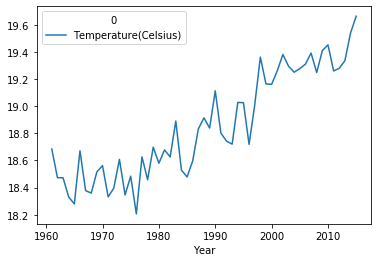

In [195]:
# Check temperature development over the entire observed period (1961-2015)
df_plot = df_complete.groupby(['Year']).mean()
df_plot.plot()

Text(0, 0.5, 'Frequency')

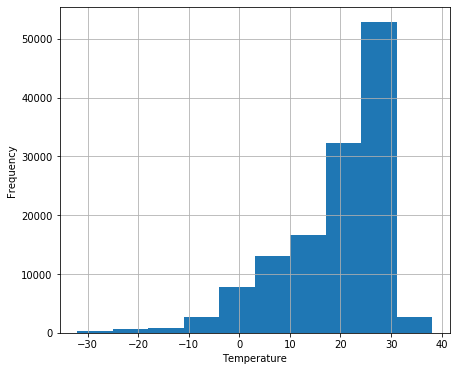

In [196]:
# Check frequency of the temperature values
hist_plot = df_complete['Temperature(Celsius)'].hist(figsize=(7, 6))
hist_plot.set_xlabel('Temperature')
hist_plot.set_ylabel('Frequency')

In [197]:
# Rename columns for convenience and easier merge
df_complete.rename(columns={"Temperature - (Celsius)": "Temperature(Celsius)", " Country" : "Country", " Statistics" : "Statistics", " Year" : "Year"}, inplace=True)
df_complete.head()

,Temperature(Celsius),Year,Statistics,Country
0,1.39097,1961,Jan Average,Afghanistan
1,0.90369,1961,Feb Average,Afghanistan
2,8.00043,1961,Mar Average,Afghanistan
3,12.35880,1961,Apr Average,Afghanistan
4,19.26180,1961,May Average,Afghanistan


# Agricultural land data

## Get overview of dataset and prepare it for merging: agricultural land by country 1961-2015
- Definition of agricultural land in this dataset:
    - Percentage of total land that is arable, used for permanent crops, and used for permanent pastures
    - Arable land includes all land used for temporary crops, temporary meadows for mowing or for pasture, land used for market or kitchen gardens, and land that is temporarily fallow 
    - Areas that are cropped multiple times are only counted once

In [198]:
# Show first 5 rows of df2
df2.head()

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,57.745918,57.837821,57.914407,58.010906,58.013969,58.072175,58.173268,58.174800,58.199308,...,58.067580,58.067580,58.067580,58.067580,58.069111,58.067580,58.067580,58.067580,58.067580,58.067580
1,Albania,44.963504,44.963504,45.000000,44.890511,45.145985,45.255474,45.401460,45.255474,45.072993,...,40.875912,40.839416,43.102190,43.843066,43.843066,43.832117,43.843066,43.332117,42.857299,42.857664
2,Algeria,19.091505,18.851764,18.688018,18.542746,18.544006,18.544006,18.579274,18.559121,18.559121,...,17.290300,17.320111,17.344043,17.373853,17.371334,17.377212,17.381490,17.395534,17.395266,17.405930
3,American Samoa,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,25.000000,24.000000,24.000000,24.500000,24.500000,24.500000,24.500000,24.500000,24.500000,24.500000
4,Andorra,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,...,46.340426,44.191489,44.170213,44.191489,42.063830,42.063830,39.914894,40.021277,40.021277,40.021277


In [199]:
# Show last 5 rows of df2
df2.tail()

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
149,Switzerland,43.925825,43.852459,43.493220,43.270593,43.047966,42.898705,42.724145,42.655839,42.688727,...,39.142647,39.060128,38.986740,38.908290,38.834902,38.758984,38.685596,38.609677,38.533758,38.182002
150,The former Yugoslav Republic of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.132127,42.647642,42.132382,40.166534,44.369548,44.329897,50.237906,49.960349,50.079302,50.079302
151,United Arab Emirates,2.488038,2.488038,2.488038,2.488038,2.500000,2.511962,2.511962,2.511962,2.511962,...,6.502392,6.430622,6.514354,4.699761,4.752392,4.706938,4.565789,4.572967,4.572967,4.572967
152,United Kingdom,81.841855,81.755053,81.622783,81.440913,80.953168,80.808498,80.825032,80.295953,80.105816,...,73.732071,72.942587,73.095523,71.611623,71.194147,70.946141,71.020543,71.302443,71.227214,70.838672
153,World,90.555241,90.555241,90.555241,90.553954,90.555241,90.555241,90.555241,90.555241,90.535287,...,73.539484,73.513736,73.472540,73.171297,73.114653,73.062514,72.990937,72.935645,72.695293,72.674052


In [200]:
# Count null values
df2.isna().sum()

Country     0
1961       23
1962       23
1963       23
1964       23
1965       23
1966       23
1967       23
1968       23
1969       23
1970       23
1971       23
1972       23
1973       23
1974       23
1975       23
1976       23
1977       23
1978       23
1979       23
1980       23
1981       23
1982       24
1983       24
1984       24
1985       24
1986       24
1987       24
1988       24
1989       24
1990       24
1991       21
1992        6
1993        4
1994        4
1995        4
1996        4
1997        4
1998        4
1999        4
2000        2
2001        2
2002        2
2003        2
2004        2
2005        2
2006        1
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
dtype: int64

In [201]:
# Change datatypes
df2['Country'] = df2['Country'].astype('category')

# Show changes
df2.dtypes

Country    category
1961        float64
1962        float64
1963        float64
1964        float64
1965        float64
1966        float64
1967        float64
1968        float64
1969        float64
1970        float64
1971        float64
1972        float64
1973        float64
1974        float64
1975        float64
1976        float64
1977        float64
1978        float64
1979        float64
1980        float64
1981        float64
1982        float64
1983        float64
1984        float64
1985        float64
1986        float64
1987        float64
1988        float64
1989        float64
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64


In [202]:
# Change the shape of dataframe
df2_ro = df2.melt(id_vars=["Country"], 
        var_name="Year", 
        value_name="Agricultural land in %")
# Reorder the data, first by country, then by year
df2_ro.sort_values(by=['Country', 'Year'], inplace=True)

In [203]:
# Reset index
df2_ro.reset_index(drop=True)

,Country,Year,Agricultural land in %
0,Afghanistan,1961,57.745918
1,Afghanistan,1962,57.837821
2,Afghanistan,1963,57.914407
3,Afghanistan,1964,58.010906
4,Afghanistan,1965,58.013969
...,...,...,...
8465,World,2011,73.062514
8466,World,2012,72.990937
8467,World,2013,72.935645
8468,World,2014,72.695293


In [204]:
# Check dataset
df2_ro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8470 entries, 0 to 8469
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 8470 non-null   category
 1   Year                    8470 non-null   object  
 2   Agricultural land in %  7703 non-null   float64 
dtypes: category(1), float64(1), object(1)
memory usage: 221.3+ KB


In [205]:
# Change type of column 'Year' and 'Agricultural land in %'
df2_ro['Year'] = df2_ro['Year'].astype('int')
df2_ro['Agricultural land in %'] = df2_ro['Agricultural land in %'].astype('float')
df2_ro.dtypes

Country                   category
Year                         int64
Agricultural land in %     float64
dtype: object

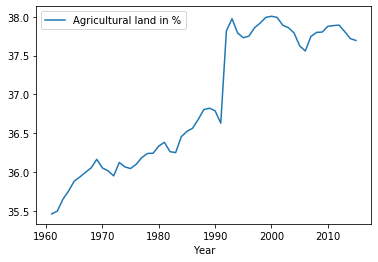

In [206]:
# Get overview about development of the data over the observed period
df2_plot = df2_ro.groupby(['Year']).mean()
df2_plot.plot()

# Merge weather data and agricultural land data

In [207]:
# Merging the datasets using the key parameters 'Country' and 'Year'
# inner join by default
df_merge = pd.merge(df_complete, df2_ro, on=['Country', 'Year'])

In [208]:
# Check
df_merge.head()

,Temperature(Celsius),Year,Statistics,Country,Agricultural land in %
0,1.39097,1961,Jan Average,Afghanistan,57.745918
1,0.90369,1961,Feb Average,Afghanistan,57.745918
2,8.00043,1961,Mar Average,Afghanistan,57.745918
3,12.35880,1961,Apr Average,Afghanistan,57.745918
4,19.26180,1961,May Average,Afghanistan,57.745918


In [209]:
# Check
df_merge.tail()

,Temperature(Celsius),Year,Statistics,Country,Agricultural land in %
86455,14.87570,2015,Aug Average,United Kingdom,70.838672
86456,11.92190,2015,Sep Average,United Kingdom,70.838672
86457,9.93445,2015,Oct Average,United Kingdom,70.838672
86458,8.04995,2015,Nov Average,United Kingdom,70.838672
86459,7.05677,2015,Dec Average,United Kingdom,70.838672


In [210]:
# Count null values
df_merge.isnull().sum()

Temperature(Celsius)         0
Year                         0
Statistics                   0
Country                      0
Agricultural land in %    7068
dtype: int64

There are 7068 null values in the column "Agricultural land in %". A deeper analysis of the null values is needed, to decide how to handle the affected rows.

In [211]:
# Change data type
df_merge['Country'] = df_merge['Country'].astype('category')

In [212]:
# Check info
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86460 entries, 0 to 86459
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Temperature(Celsius)    86460 non-null  float64 
 1   Year                    86460 non-null  int64   
 2   Statistics              86460 non-null  object  
 3   Country                 86460 non-null  category
 4   Agricultural land in %  79392 non-null  float64 
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 3.5+ MB


In [213]:
# Creation of a CSV file of the merged dataset to load it into a new notebook for further work
df_merge.to_csv('weather_agricult.csv', index=False)